In [108]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
import os
os.chdir("C:\\Users\\dalto\\OpM na Prática\\Python\\Base de Dados")

df = pd.read_csv("timeline.csv")
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [5]:
df["month"] = pd.to_datetime(df["month"]).dt.normalize()
df

,month,diet,gym,finance
0,2004-01-01,100,31,48
1,2004-02-01,75,26,49
2,2004-03-01,67,24,47
3,2004-04-01,70,22,48
4,2004-05-01,72,22,43
...,...,...,...,...
163,2017-08-01,46,52,43
164,2017-09-01,44,50,47
165,2017-10-01,44,47,45
166,2017-11-01,41,47,47


In [8]:
df = df.set_index("month")
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2004-01-01 to 2017-12-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   diet     168 non-null    int64
 1   gym      168 non-null    int64
 2   finance  168 non-null    int64
dtypes: int64(3)
memory usage: 5.2 KB


<AxesSubplot:xlabel='month'>

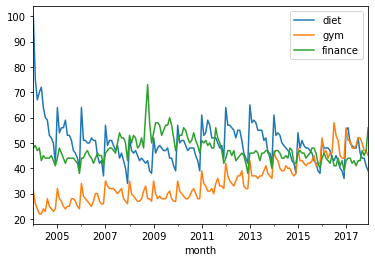

In [11]:
df.plot()

<AxesSubplot:xlabel='month'>

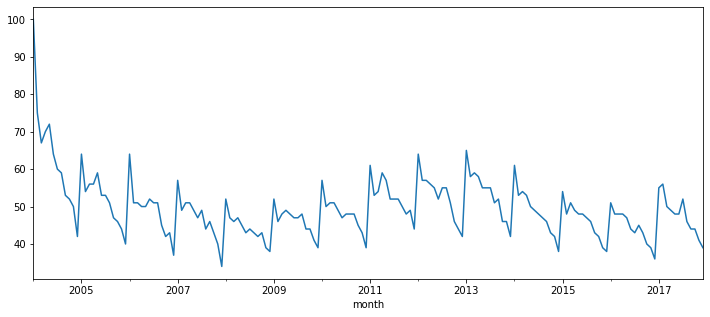

In [15]:
df.diet.plot(figsize=(12,5))

<AxesSubplot:xlabel='month'>

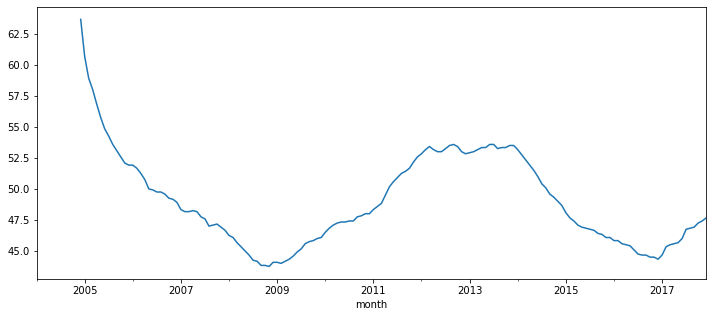

In [16]:
# Usando médias móveis para diminuir o ruído

df.diet.rolling(12).mean().plot(figsize=(12,5))

<AxesSubplot:xlabel='month'>

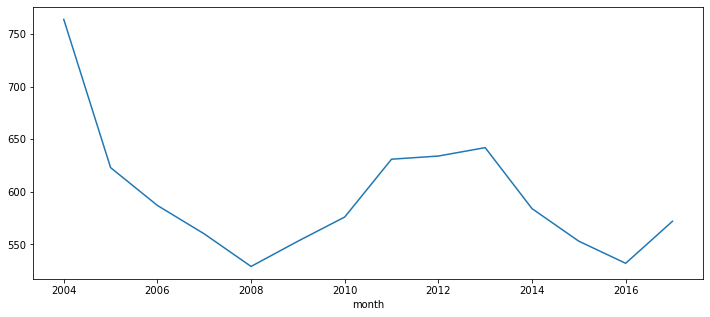

In [18]:
#df.diet.groupby(df.index.year).sum()
df.diet.groupby(df.index.year).sum().plot(figsize=(12,5))

<AxesSubplot:xlabel='month'>

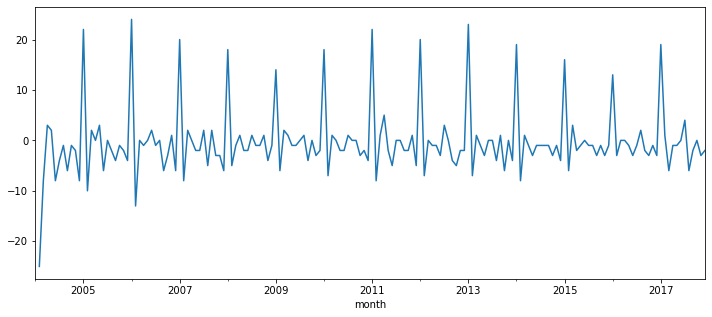

In [20]:
# Analisando sazonalidade ao eliminar a tendência

df.diet.diff().plot(figsize=(12,5))

<AxesSubplot:xlabel='month'>

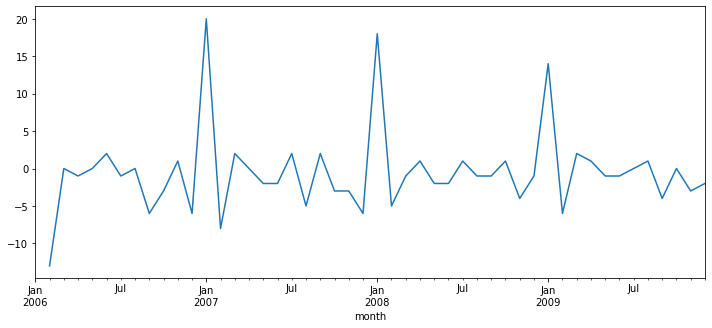

In [23]:
filtro = (df.index.year >= 2006) & (df.index.year <=2009)
df[filtro].diet.diff().plot(figsize=(12,5))

<AxesSubplot:xlabel='month'>

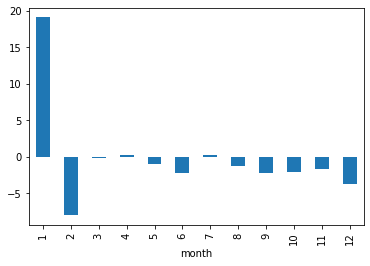

In [24]:
df.diet.diff().groupby(df.index.month).mean().plot(kind='bar')

In [26]:
df = pd.read_csv("shampoo.csv")
df["Month"] = pd.to_datetime(df["Month"]).dt.normalize()
df = df.set_index("Month")
df.head()

,Sales
Month,
2000-01-01,266.0
2000-02-01,145.9
2000-03-01,183.1
2000-04-01,119.3
2000-05-01,180.3


In [27]:
df['Naive'] = df.Sales.shift(1)
df.head()

,Sales,Naive
Month,,
2000-01-01,266.0,NaN
2000-02-01,145.9,266.0
2000-03-01,183.1,145.9
2000-04-01,119.3,183.1
2000-05-01,180.3,119.3


<AxesSubplot:xlabel='Month'>

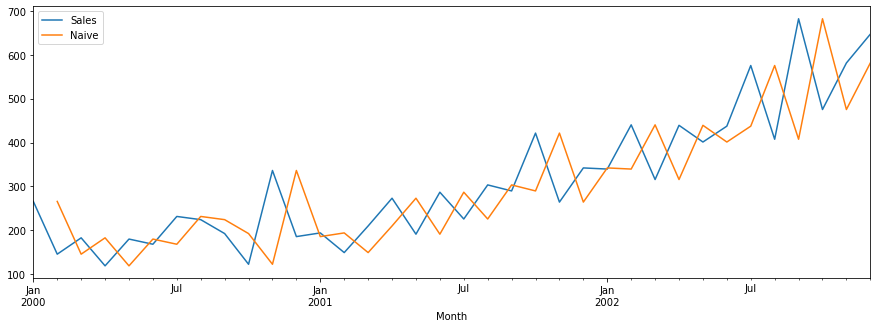

In [29]:
df.plot(figsize=(15,5))

In [32]:
err = (df.Sales - df.Naive) **2 
err.mean()

11715.388285714287

In [33]:
df = pd.read_csv("shampoo.csv")
df["Month"] = pd.to_datetime(df["Month"]).dt.normalize()
df = df.set_index("Month")
df.head()

,Sales
Month,
2000-01-01,266.0
2000-02-01,145.9
2000-03-01,183.1
2000-04-01,119.3
2000-05-01,180.3


In [35]:
df['x1']= df.Sales.shift(1)
df.dropna(axis=0, inplace = True)
df.head()

,Sales,x1
Month,,
2000-02-01,145.9,266.0
2000-03-01,183.1,145.9
2000-04-01,119.3,183.1
2000-05-01,180.3,119.3
2000-06-01,168.5,180.3


In [39]:
x = df.x1.values
y = df.Sales.values

In [40]:
reg = LinearRegression().fit(x.reshape(-1,1),y)
pred = reg.predict(x.reshape(-1,1))
pred

array([285.09370291, 191.61072318, 220.56631724, 170.90591668,
       218.38686392, 209.20202495, 258.47323741, 252.79109126,
       228.11656622, 173.70807095, 339.9692239 , 222.74577055,
       229.2841305 , 194.41287745, 241.58247421, 290.77584906,
       227.02683957, 301.43960278, 253.95865554, 314.36064744,
       303.69689371, 406.20903718, 283.92613863, 344.48380577,
       342.46002769, 420.84250944, 323.9346745 , 419.98629564,
       390.40800064, 418.50738089, 526.00113194, 395.3117706 ,
       608.89819556, 448.00783827, 530.5157138 ])

In [41]:
((y-pred) **2).mean()

10668.73613429366

In [42]:
df['ar1']=pred
df.head()

,Sales,x1,ar1
Month,,,
2000-02-01,145.9,266.0,285.093703
2000-03-01,183.1,145.9,191.610723
2000-04-01,119.3,183.1,220.566317
2000-05-01,180.3,119.3,170.905917
2000-06-01,168.5,180.3,218.386864


<AxesSubplot:xlabel='Month'>

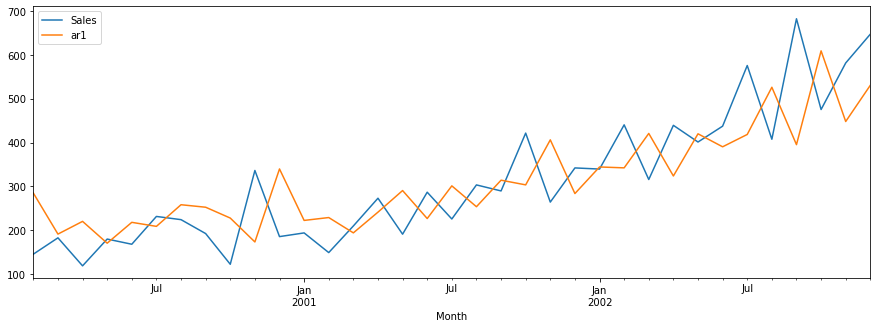

In [44]:
df[['Sales','ar1']].plot(figsize=(15,5))

In [74]:
df = pd.read_csv("shampoo.csv")
df["Month"] = pd.to_datetime(df["Month"]).dt.normalize()
df = df.set_index("Month")
df.head()

,Sales
Month,
2000-01-01,266.0
2000-02-01,145.9
2000-03-01,183.1
2000-04-01,119.3
2000-05-01,180.3


In [57]:
ar2 = AutoReg(df.Sales, lags = 2 ).fit()

C:\Users\dalto\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dalto\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [59]:
(ar2.resid **2).mean()

5154.048667052169

In [60]:
ar2.resid.describe()

count    3.400000e+01
mean     1.329133e-13
std      7.287134e+01
min     -1.213016e+02
25%     -5.535156e+01
50%      3.538038e+00
75%      3.114397e+01
max      1.473753e+02
dtype: float64

<AxesSubplot:>

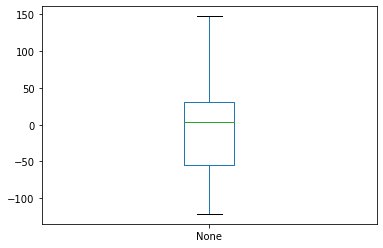

In [61]:
ar2.resid.plot(kind='box')

<AxesSubplot:>

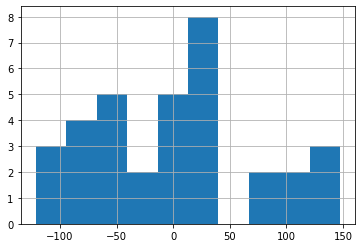

In [64]:
ar2.resid.hist()

In [66]:
ar3 = AutoReg(df.Sales, lags = 3 ).fit()
(ar3.resid **2).mean()

C:\Users\dalto\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dalto\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


4389.270411689365

In [67]:
df['ar3'] = ar3.predict()

<AxesSubplot:xlabel='Month'>

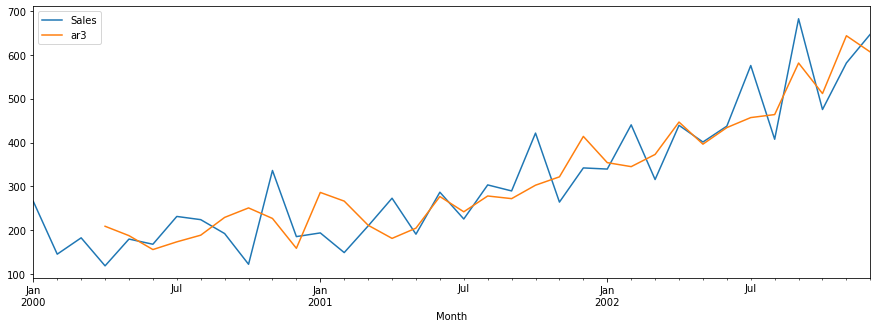

In [68]:
df.plot(figsize=(15,5))

In [69]:
df.tail()

,Sales,ar3
Month,,
2002-08-01,407.6,463.791362
2002-09-01,682.0,581.178839
2002-10-01,475.3,511.689110
2002-11-01,581.3,643.299983
2002-12-01,646.9,606.218915


In [70]:
ar3.predict(start='2003-01-01', end='2003-01-01')

C:\Users\dalto\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


2003-01-01    595.230272
Freq: MS, dtype: float64

In [71]:
df

,Sales,ar3
Month,,
2000-01-01,266.0,NaN
2000-02-01,145.9,NaN
2000-03-01,183.1,NaN
2000-04-01,119.3,209.429609
2000-05-01,180.3,188.062540
2000-06-01,168.5,156.398215
2000-07-01,231.8,173.948595
2000-08-01,224.5,189.129327
2000-09-01,192.8,229.614493


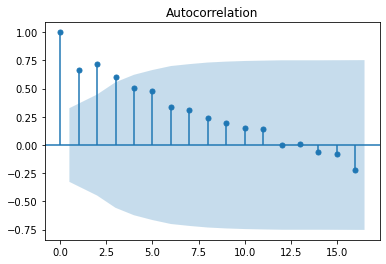

In [79]:
plot_acf(df.Sales)
plt.show()

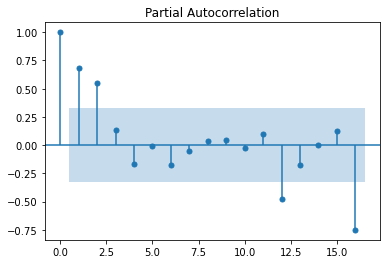

In [80]:
plot_pacf(df.Sales)
plt.show()

In [81]:
model = AutoReg(df.Sales, lags = 2).fit()

C:\Users\dalto\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dalto\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [82]:
train = df.Sales[:24]
test = df.Sales[24:]

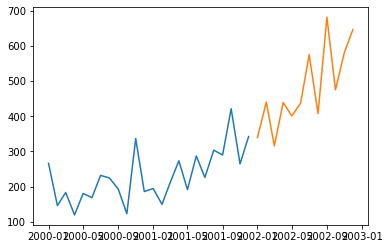

In [84]:
plt.plot(train)
plt.plot(test)

In [86]:
ar2=AutoReg(train, lags = 2).fit()

C:\Users\dalto\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dalto\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [87]:
ar2.params

intercept    82.005541
Sales.L1      0.183201
Sales.L2      0.488723
dtype: float64

In [90]:
pred = ar2.params[0]+ar2.params[1] * test.shift(1)+ar2.params[2] * test.shift(2)

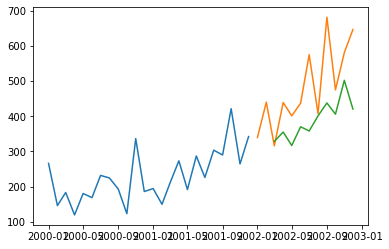

In [91]:
plt.plot(train)
plt.plot(test)
plt.plot(pred)

In [93]:
ar5=AutoReg(train, lags = 5).fit()
ar5.params

C:\Users\dalto\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dalto\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


intercept    0.986921
Sales.L1    -0.065935
Sales.L2     0.288687
Sales.L3     0.092468
Sales.L4     0.547897
Sales.L5     0.287857
dtype: float64

In [94]:
pred2 = ar2.params[0]
for i, coef in enumerate (ar5.params[1:]):
    pred2 += coef * test.shift(i+1)
pred2

Month
2002-01-01           NaN
2002-02-01           NaN
2002-03-01           NaN
2002-04-01           NaN
2002-05-01           NaN
2002-06-01    550.655399
2002-07-01    509.489496
2002-08-01    539.064023
2002-09-01    608.041751
2002-10-01    563.088892
2002-11-01    726.464351
2002-12-01    632.937817
Name: Sales, dtype: float64

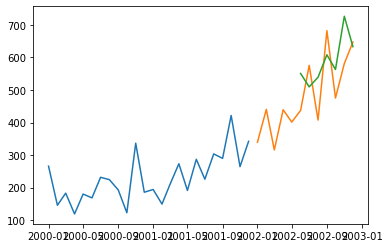

In [95]:
plt.plot(train)
plt.plot(test)
plt.plot(pred2)

In [105]:
df = pd.read_csv("clima_india.csv")
df.head()
df.date = pd.to_datetime(df.date)
df.set_index("date", inplace = True)
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [113]:
arma = ARIMA(df.wind_speed, freq = 'D', order=(2,1,2)).fit()

C:\Users\dalto\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [115]:
arma

In [116]:
train=df.wind_speed[:975]
test=df.wind_speed[975:]

In [121]:
armaTr = ARIMA(train, freq = 'D', order=(2,1,2)).fit()
armaTr.params

C:\Users\dalto\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ar.L1     -0.609225
ar.L2      0.272043
ma.L1     -0.051127
ma.L2     -0.872171
sigma2    18.809891
dtype: float64

In [122]:
armaTe = ARIMA(test, freq = 'D', order=(2,1,2)).fit(armaTr.params)

C:\Users\dalto\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [124]:
(armaTe.resid**2).mean()

11.12482483118005

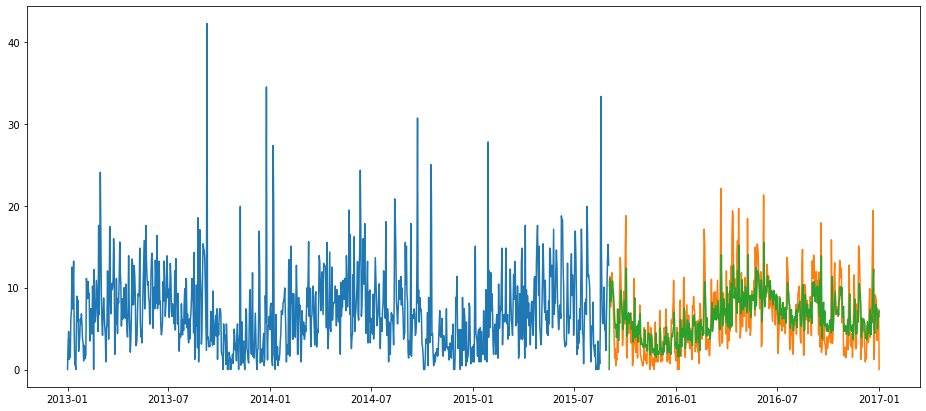

In [127]:
plt.figure(figsize=(16,7))
plt.plot(train)
plt.plot(test)
plt.plot(armaTe.predict())